# 대전시 주유소 가격 정보

In [2]:
from selenium import webdriver

In [17]:
driver = webdriver.Chrome('../driver/chromedriver')
driver.get("http://www.opinet.co.kr/searRgSelect.do")
driver.get("http://www.opinet.co.kr/searRgSelect.do")

In [4]:
gu_list_raw = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
gu_list = gu_list_raw.find_elements_by_tag_name("option")

In [5]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['대덕구', '동구', '서구', '유성구', '중구']

In [8]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0])

In [9]:
xpath = '//*[@id="searRgSelect"]'
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [10]:
xpath = '//*[@id="glopopd_excel"]'
element_get_excel = driver.find_element_by_xpath(xpath).click()

In [24]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath = '//*[@id="searRgSelect"]'
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath = '//*[@id="glopopd_excel"]'
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

In [12]:
driver.close()

# 구별 주유 가격 데이터 정리

In [13]:
import pandas as pd
from glob import glob

In [25]:
glob('../data/대전지역*.xls')

['../data\\대전지역_위치별(주유소) (30).xls',
 '../data\\대전지역_위치별(주유소) (31).xls',
 '../data\\대전지역_위치별(주유소) (32).xls',
 '../data\\대전지역_위치별(주유소) (33).xls',
 '../data\\대전지역_위치별(주유소) (34).xls']

In [26]:
stations_files = glob('../data/대전지역*.xls')
stations_files

['../data\\대전지역_위치별(주유소) (30).xls',
 '../data\\대전지역_위치별(주유소) (31).xls',
 '../data\\대전지역_위치별(주유소) (32).xls',
 '../data\\대전지역_위치별(주유소) (33).xls',
 '../data\\대전지역_위치별(주유소) (34).xls']

In [27]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [28]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 59
Data columns (total 10 columns):
지역       241 non-null object
상호       241 non-null object
주소       241 non-null object
상표       241 non-null object
전화번호     241 non-null object
셀프여부     241 non-null object
고급휘발유    241 non-null object
휘발유      241 non-null object
경유       241 non-null object
실내등유     241 non-null object
dtypes: object(10)
memory usage: 20.7+ KB


In [32]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,대전광역시,소망주유소,대전 중구 보문산로 307 (문화동),GS칼텍스,042-584-0413,Y,-,1495,1355,-
1,대전광역시,천지인주유소,대전 중구 대종로 44 (옥계동),자가상표,042-272-6100,Y,-,1497,1357,930
2,대전광역시,(주)석교주유소,대전 중구 대종로 207 (석교동),SK에너지,042-273-7755,Y,-,1498,1359,-
3,대전광역시,진성주유소,대전광역시 중구 대종로 122 (호동),SK에너지,042-271-8511,Y,-,1498,1367,990
4,대전광역시,이화주유소,대전 중구 대종로 166 (석교동),SK에너지,042-274-5189,N,-,1499,1369,950


In [34]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'],
                        '가격':station_raw['휘발유'],
                        '상표':station_raw['상표'],
                        '셀프':station_raw['셀프여부'],
                        '주소':station_raw['주소']})
stations.head()

,Oil_store,가격,상표,셀프,주소
0,소망주유소,1495,GS칼텍스,Y,대전 중구 보문산로 307 (문화동)
1,천지인주유소,1497,자가상표,Y,대전 중구 대종로 44 (옥계동)
2,(주)석교주유소,1498,SK에너지,Y,대전 중구 대종로 207 (석교동)
3,진성주유소,1498,SK에너지,Y,대전광역시 중구 대종로 122 (호동)
4,이화주유소,1499,SK에너지,N,대전 중구 대종로 166 (석교동)


In [48]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,가격,상표,셀프,주소,구
0,소망주유소,1495,GS칼텍스,Y,대전 중구 보문산로 307 (문화동),중구
1,천지인주유소,1497,자가상표,Y,대전 중구 대종로 44 (옥계동),중구
2,(주)석교주유소,1498,SK에너지,Y,대전 중구 대종로 207 (석교동),중구
3,진성주유소,1498,SK에너지,Y,대전광역시 중구 대종로 122 (호동),중구
4,이화주유소,1499,SK에너지,N,대전 중구 대종로 166 (석교동),중구


In [38]:
stations['구'].unique()

array(['중구', '광역시', '대덕구', '동구', '서구', '유성구'], dtype=object)

In [39]:
stations[stations['구']=='광역시']

,Oil_store,가격,상표,셀프,주소,구
16,도서관주유소,1515,현대오일뱅크,Y,대전 광역시 중구 보문산로 353,광역시


In [49]:
stations.loc[stations['구']=='광역시', '구'] = '중구'
stations['구'].unique()

array(['중구', '대덕구', '동구', '서구', '유성구'], dtype=object)

In [50]:
stations[stations['가격']=='-']

,Oil_store,가격,상표,셀프,주소,구
40,금성주유소,-,S-OIL,Y,대전 중구 동서대로 1183 (태평동),중구
46,금강주유소,-,현대오일뱅크,N,대전 서구 갈마로 174 (괴정동),서구
59,지에스칼텍스(주)21세기주유소,-,GS칼텍스,N,대전 유성구 유성대로 845 (궁동),유성구


In [51]:
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,가격,상표,셀프,주소,구
0,소망주유소,1495,GS칼텍스,Y,대전 중구 보문산로 307 (문화동),중구
1,천지인주유소,1497,자가상표,Y,대전 중구 대종로 44 (옥계동),중구
2,(주)석교주유소,1498,SK에너지,Y,대전 중구 대종로 207 (석교동),중구
3,진성주유소,1498,SK에너지,Y,대전광역시 중구 대종로 122 (호동),중구
4,이화주유소,1499,SK에너지,N,대전 중구 대종로 166 (석교동),중구


In [134]:
stations['가격'] = [float(value) for value in stations['가격']]

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
stations.reset_index(inplace=True)
del stations['index']

In [136]:
stations['가격'].unique()

array([1495., 1497., 1498., 1499., 1504., 1505., 1506., 1509., 1510.,
       1514., 1515., 1517., 1519., 1525., 1528., 1529., 1535., 1547.,
       1549., 1554., 1559., 1560., 1565., 1570., 1575., 1579., 1595.,
       1598., 1609., 1513., 1518., 1524., 1527., 1534., 1537., 1538.,
       1539., 1545., 1555., 1558., 1569., 1578., 1588., 1589., 1599.,
       1625., 1635., 1649., 1687., 1695., 1863., 1503., 1508., 1516.,
       1576., 1639., 1683., 1487., 1489., 1491., 1493., 1494., 1530.,
       1544., 1557., 1577., 1585., 1587., 1597., 1628., 1799., 1490.,
       1492., 1522., 1531., 1548., 1568., 1659., 1699.])

In [137]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 6 columns):
Oil_store    238 non-null object
가격           238 non-null float64
상표           238 non-null object
셀프           238 non-null object
주소           238 non-null object
구            238 non-null object
dtypes: float64(1), object(5)
memory usage: 11.2+ KB


# 셀프 주유소와 일반 주유소 비교

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

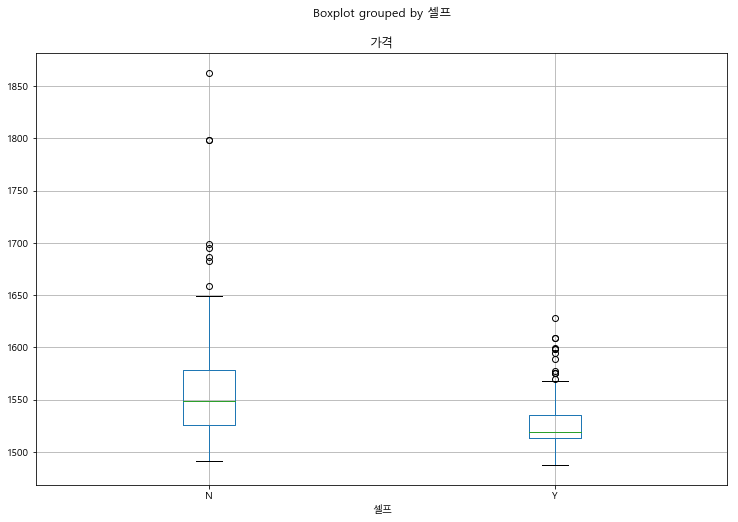

In [139]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

                              <- 일반 주유소 셀프 주유소 ->

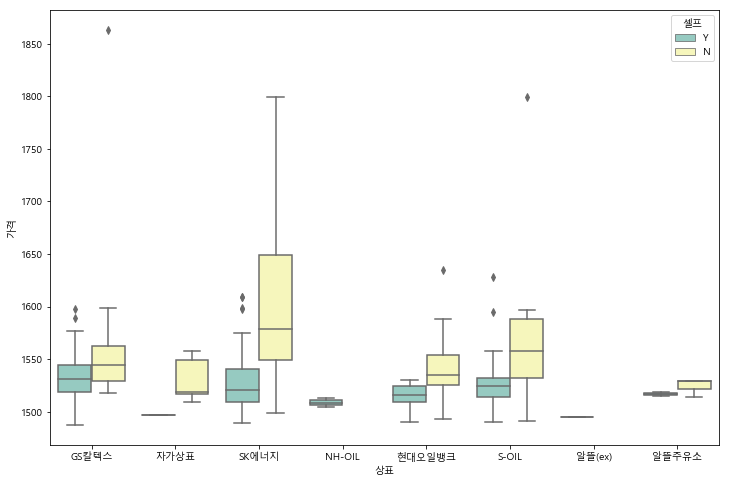

In [140]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.show()

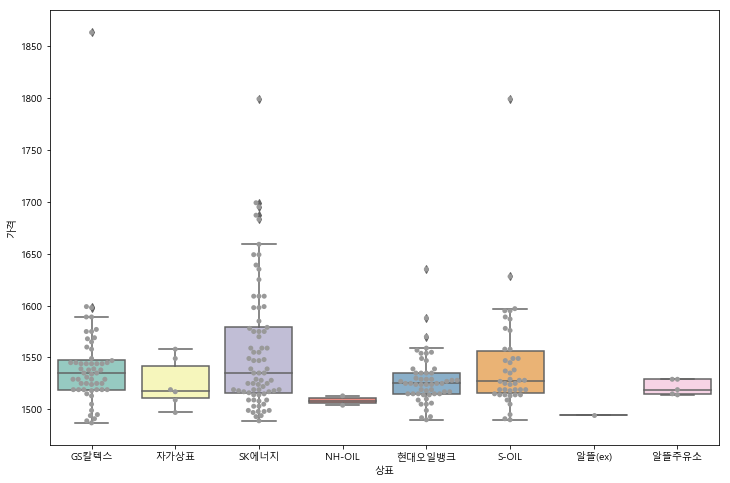

In [141]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="상표", y="가격", data=stations, color=".6")
plt.show()

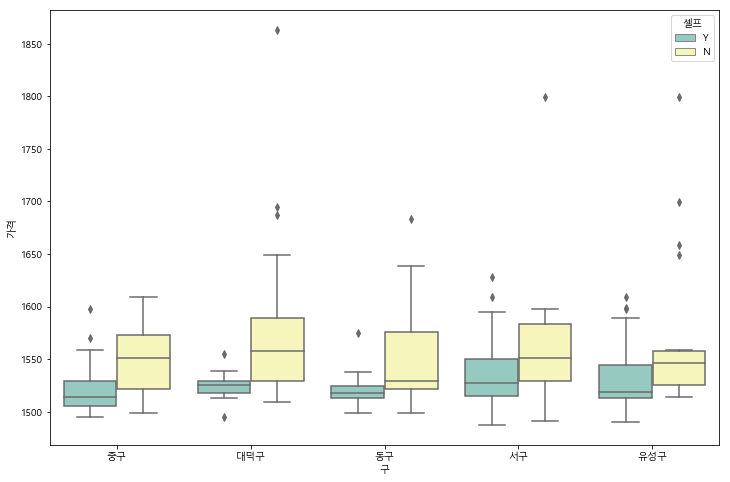

In [142]:
plt.figure(figsize=(12,8))
sns.boxplot(x="구", y="가격", hue="셀프", data=stations, palette="Set3")
plt.show()

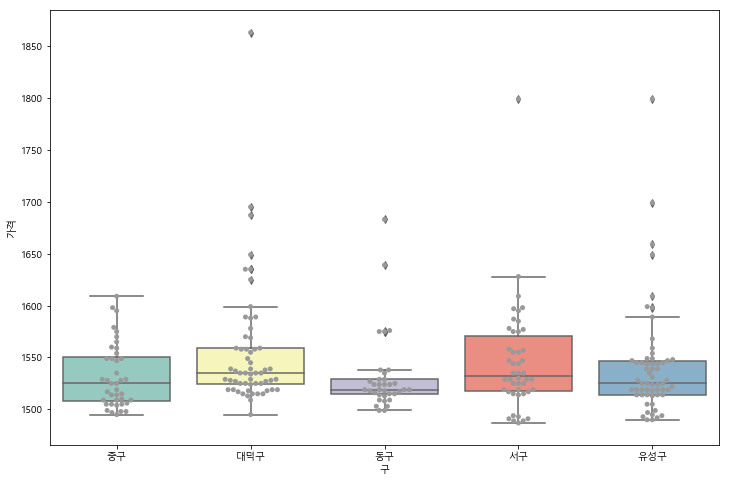

In [143]:
plt.figure(figsize=(12,8))
sns.boxplot(x="구", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="구", y="가격", data=stations, color=".6")
plt.show()

In [144]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [145]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,가격,상표,셀프,주소,구
97,한솔주유소,1863.0,GS칼텍스,N,대전 대덕구 한밭대로 1036 (오정동),대덕구
237,계룡주유소,1799.0,S-OIL,N,대전 유성구 현충원로 177 (갑동),유성구
178,백산주유소,1799.0,SK에너지,N,대전광역시 서구 동서대로 1068 (변동),서구
236,노은,1699.0,SK에너지,N,대전 유성구 노은동로 79,유성구
96,대전4공단,1695.0,SK에너지,N,대전 대덕구 대덕대로 1412,대덕구
95,맘모스주유소,1687.0,SK에너지,N,대전 대덕구 동서대로 1756 (비래동),대덕구
132,동명주유소,1683.0,SK에너지,N,대전 동구 한밭대로 1239 (용전동),동구
235,온천주유소,1659.0,SK에너지,N,대전 유성구 현충원로 342 (구암동),유성구
234,첨단주유소,1649.0,SK에너지,N,대전 유성구 가정로 27 (신성동),유성구
94,OK(구.영광),1649.0,SK에너지,N,대전 대덕구 대전로 1312 (읍내동),대덕구


In [146]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,가격,상표,셀프,주소,구
133,대림주유소,1487.0,GS칼텍스,Y,대전 서구 계백로1290 (정림동),서구
134,갈마주유소,1489.0,GS칼텍스,Y,대전 서구 신갈마로 130,서구
135,(주)가수원하늘셀프주유소,1489.0,SK에너지,Y,대전 서구 계백로 1176 (가수원동),서구
179,롯데마트 서대전점주유소,1490.0,S-OIL,Y,대전광역시 유성구 유성대로 26-37 (원내동),유성구
180,관저주유소,1490.0,현대오일뱅크,Y,대전광역시 유성구 계백로 975 (원내동),유성구
136,동현주유소,1491.0,S-OIL,N,대전 서구 계백로 1327 (정림동),서구
137,중도석유(주)도마동주유소,1491.0,GS칼텍스,Y,대전 서구 계백로 1371 (도마동),서구
181,(주)퍼스트오일,1492.0,현대오일뱅크,Y,대전 유성구 현충원로 213 (갑동),유성구
138,굿모닝주유소,1493.0,현대오일뱅크,N,대전광역시 서구 계백로 1376 (도마동),서구
182,계림주유소,1493.0,SK에너지,Y,대전 유성구 현충원로 201 (갑동),유성구


In [147]:
import numpy as np
gu_data = pd.pivot_table(stations, index=["구"], values=["가격"], aggfunc=np.mean)
gu_data.head()

,가격
구,
대덕구,1555.258621
동구,1531.342857
서구,1545.760870
유성구,1541.813559
중구,1532.125000


In [148]:
map = folium.Map(location=[36.35111,127.43500], zoom_start=10.5)
map

# 대전시 주유 가격 상하위 10개 주유소

In [149]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,가격,상표,셀프,주소,구
97,한솔주유소,1863.0,GS칼텍스,N,대전 대덕구 한밭대로 1036 (오정동),대덕구
237,계룡주유소,1799.0,S-OIL,N,대전 유성구 현충원로 177 (갑동),유성구
178,백산주유소,1799.0,SK에너지,N,대전광역시 서구 동서대로 1068 (변동),서구
236,노은,1699.0,SK에너지,N,대전 유성구 노은동로 79,유성구
96,대전4공단,1695.0,SK에너지,N,대전 대덕구 대덕대로 1412,대덕구
95,맘모스주유소,1687.0,SK에너지,N,대전 대덕구 동서대로 1756 (비래동),대덕구
132,동명주유소,1683.0,SK에너지,N,대전 동구 한밭대로 1239 (용전동),동구
235,온천주유소,1659.0,SK에너지,N,대전 유성구 현충원로 342 (구암동),유성구
234,첨단주유소,1649.0,SK에너지,N,대전 유성구 가정로 27 (신성동),유성구
94,OK(구.영광),1649.0,SK에너지,N,대전 대덕구 대전로 1312 (읍내동),대덕구


In [150]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,가격,상표,셀프,주소,구
133,대림주유소,1487.0,GS칼텍스,Y,대전 서구 계백로1290 (정림동),서구
134,갈마주유소,1489.0,GS칼텍스,Y,대전 서구 신갈마로 130,서구
135,(주)가수원하늘셀프주유소,1489.0,SK에너지,Y,대전 서구 계백로 1176 (가수원동),서구
179,롯데마트 서대전점주유소,1490.0,S-OIL,Y,대전광역시 유성구 유성대로 26-37 (원내동),유성구
180,관저주유소,1490.0,현대오일뱅크,Y,대전광역시 유성구 계백로 975 (원내동),유성구
136,동현주유소,1491.0,S-OIL,N,대전 서구 계백로 1327 (정림동),서구
137,중도석유(주)도마동주유소,1491.0,GS칼텍스,Y,대전 서구 계백로 1371 (도마동),서구
181,(주)퍼스트오일,1492.0,현대오일뱅크,Y,대전 유성구 현충원로 213 (갑동),유성구
138,굿모닝주유소,1493.0,현대오일뱅크,N,대전광역시 서구 계백로 1376 (도마동),서구
182,계림주유소,1493.0,SK에너지,Y,대전 유성구 현충원로 201 (갑동),유성구


In [151]:
gmaps_key = ""
gmaps = googlemaps.Client(key=gmaps_key)

In [152]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
        
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

,Oil_store,가격,상표,셀프,주소,구,lat,lng
97,한솔주유소,1863.0,GS칼텍스,N,대전 대덕구 한밭대로 1036 (오정동),대덕구,36.357226,127.413666
237,계룡주유소,1799.0,S-OIL,N,대전 유성구 현충원로 177 (갑동),유성구,36.360484,127.291032
178,백산주유소,1799.0,SK에너지,N,대전광역시 서구 동서대로 1068 (변동),서구,36.329322,127.379376
236,노은,1699.0,SK에너지,N,대전 유성구 노은동로 79,유성구,36.367684,127.320970
96,대전4공단,1695.0,SK에너지,N,대전 대덕구 대덕대로 1412,대덕구,36.445813,127.406786
95,맘모스주유소,1687.0,SK에너지,N,대전 대덕구 동서대로 1756 (비래동),대덕구,36.352336,127.443365
132,동명주유소,1683.0,SK에너지,N,대전 동구 한밭대로 1239 (용전동),동구,36.357172,127.435497
235,온천주유소,1659.0,SK에너지,N,대전 유성구 현충원로 342 (구암동),유성구,36.359076,127.308550
234,첨단주유소,1649.0,SK에너지,N,대전 유성구 가정로 27 (신성동),유성구,36.384548,127.346402
94,OK(구.영광),1649.0,SK에너지,N,대전 대덕구 대전로 1312 (읍내동),대덕구,36.370840,127.420763


In [153]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = oil_price_bottom10['주소'][n].split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
        
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

,Oil_store,가격,상표,셀프,주소,구,lat,lng
133,대림주유소,1487.0,GS칼텍스,Y,대전 서구 계백로1290 (정림동),서구,36.307786,127.366271
134,갈마주유소,1489.0,GS칼텍스,Y,대전 서구 신갈마로 130,서구,36.345155,127.368787
135,(주)가수원하늘셀프주유소,1489.0,SK에너지,Y,대전 서구 계백로 1176 (가수원동),서구,36.304958,127.354233
179,롯데마트 서대전점주유소,1490.0,S-OIL,Y,대전광역시 유성구 유성대로 26-37 (원내동),유성구,36.300484,127.324834
180,관저주유소,1490.0,현대오일뱅크,Y,대전광역시 유성구 계백로 975 (원내동),유성구,36.301928,127.332011
136,동현주유소,1491.0,S-OIL,N,대전 서구 계백로 1327 (정림동),서구,36.309715,127.369623
137,중도석유(주)도마동주유소,1491.0,GS칼텍스,Y,대전 서구 계백로 1371 (도마동),서구,36.310892,127.374258
181,(주)퍼스트오일,1492.0,현대오일뱅크,Y,대전 유성구 현충원로 213 (갑동),유성구,36.360531,127.294733
138,굿모닝주유소,1493.0,현대오일뱅크,N,대전광역시 서구 계백로 1376 (도마동),서구,36.310523,127.375077
182,계림주유소,1493.0,SK에너지,Y,대전 유성구 현충원로 201 (갑동),유성구,36.360441,127.293352


In [171]:
map = folium.Map(location=[36.35111,127.43500], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]],
                           radius=15, color='#CD3181', fill_color='#CD3181').add_to(map)
        
for n in oil_price_bottom10.index:
   
    if pd.notnull(oil_price_bottom10['lat'][n]):
        folium.CircleMarker([oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]],
                           radius=15, color='#3186cc', fill_color='#3181cc').add_to(map)
        
map

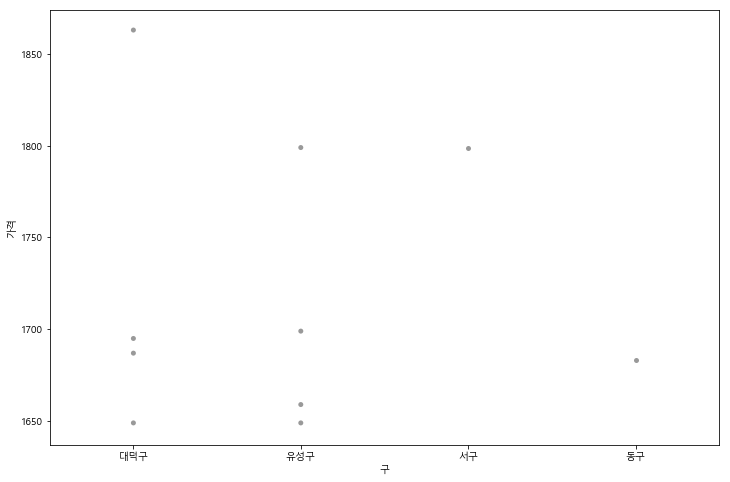

In [181]:
plt.figure(figsize=(12,8))
sns.swarmplot(x="구", y="가격", data=oil_price_top10, color=".6")
plt.show()

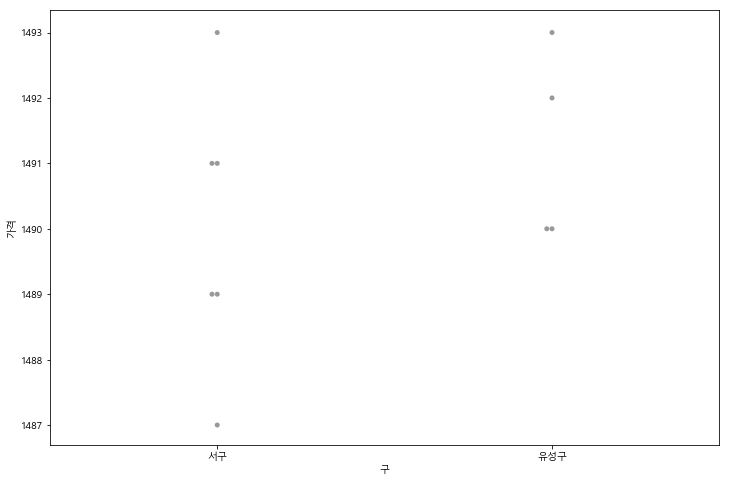

In [182]:
plt.figure(figsize=(12,8))
sns.swarmplot(x="구", y="가격", data=oil_price_bottom10, color=".6")
plt.show()